<a href="https://colab.research.google.com/github/eunsun53/ML_proj/blob/main/AI%ED%97%88%EB%B8%8C%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5track_%EA%B0%95%EC%95%84%EC%A7%80_%EC%96%BC%EA%B5%B4_detect_%EC%8A%A4%EB%85%B8%EC%9A%B0_%EC%B9%B4%EB%A9%94%EB%9D%BC_%EA%B8%B0%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import dlib, cv2, os 
from imutils import face_utils
import numpy as np 
import matplotlib.pyplot as plt 


In [6]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
cd /content/gdrive/MyDrive/dataset/dog_face

/content/gdrive/MyDrive/dataset/dog_face


In [8]:
!unzip dog_face.zip

unzip:  cannot find or open dog_face.zip, dog_face.zip.zip or dog_face.zip.ZIP.


In [9]:
ls

dogHeadDetector.dat  img/  img.zip  landmarkDetector.dat


In [10]:
cd dog_face

[Errno 2] No such file or directory: 'dog_face'
/content/gdrive/MyDrive/dataset/dog_face


In [11]:
!unzip img.zip

Archive:  img.zip
  inflating: 01.jpg                  
  inflating: 01_out.jpg              
  inflating: 01_out2.jpg             
  inflating: 02.jpg                  
  inflating: 02_out.jpg              
  inflating: 02_out2.jpg             
  inflating: 03.jpg                  
  inflating: 03_out.jpg              
  inflating: 03_out2.jpg             
  inflating: 04.jpg                  
  inflating: 04_out.jpg              
  inflating: 04_out2.jpg             
  inflating: 05.jpg                  
  inflating: 05_out.jpg              
  inflating: 05_out2.jpg             
  inflating: 06.jpg                  
  inflating: 06_out.jpg              
  inflating: 06_out2.jpg             
  inflating: 07.jpg                  
  inflating: 07_out.jpg              
  inflating: 07_out2.jpg             
  inflating: 08.jpg                  
  inflating: 08_out.jpg              
  inflating: 08_out2.jpg             
  inflating: 09.jpg                  
  inflating: 09_out.jpg         

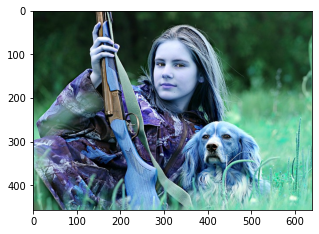

In [12]:
img_path = 'img/hunter640.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path)) #파일명과 확장자 분리 

img = cv2.imread(img_path) # cv는 BGR로 읽어와서 원본의 이미지와 컬러가 다름

plt.figure(figsize = (5, 5))
plt.imshow(img)

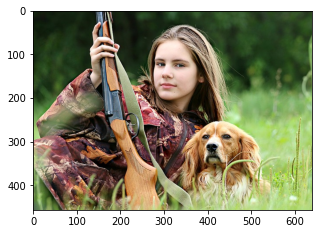

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR<->RGB

plt.figure(figsize = (5, 5))
plt.imshow(img)

#스노우 카메라 기능 구현
> 강아지 얼굴 검출해서 필터 씌우기 기능 

In [14]:
# load model 
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat') #강아지 얼굴 검출 detector, # cnn detector가 gpu 요구
predictor = dlib.shape_predictor('landmarkDetector.dat') #강아지 얼굴 내에 중요 지점(landmark) 검출 


In [15]:
dets = detector(img, upsample_num_times = 1) # 검출 실행, 검출된 사각형 영역의 대각선 두 좌표 정보 리턴 
print(dets)

mmod_rectangles[[(355, 245) (473, 363)]]


355 245
473 363


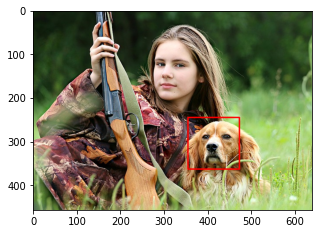

In [16]:
#img에 검출된 retangle 표현
img_result = img.copy()

for i, d in enumerate(dets):
  #print('detection {}: left: {} Top:{} Right: {} Bottom: {} Confidence: {}'.format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence()))
  x1, y1 = d.rect.left(), d.rect.top()
  x2, y2 = d.rect.right(), d.rect.bottom()
  print(x1, y1)
  print(x2, y2)
  cv2.rectangle(img_result, pt1 =(x1,y1), pt2=(x2, y2), thickness = 2, color = (255, 0, 0), lineType = cv2.LINE_AA)

plt.figure(figsize = (5, 5))
plt.imshow(img_result)

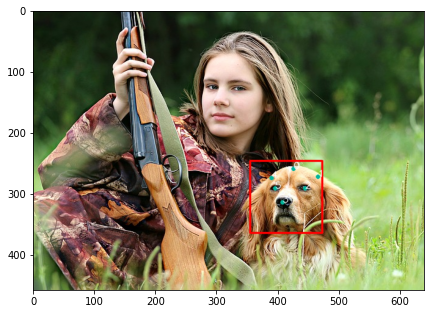

In [17]:
#predict landmarks
shapes = []
for i, d in enumerate(dets):
  shape = predictor(img, d.rect)
  shape = face_utils.shape_to_np(shape)

  shapes.append(shape)

  for i, p in enumerate(shape): 
    cv2.circle(img_result, center = tuple(p), radius = 3, color = (0, 180, 155), thickness = -1, lineType = cv2.LINE_AA)
    cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

plt.figure(figsize = (7, 7))
plt.imshow(img_result)

In [18]:
img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
cv2.imwrite('img/%s_out%s'% (filename, ext), img_out)

True

In [31]:
# 뿔과 코 달아주기-overlay 
from math import atan2, degrees

def overlay_transparent(background_img, img_to_overlay_t, x, y, overlay_size = None):
  img_to_overlay_t = cv2.cvtColor(img_to_overlay_t, cv2.COLOR_BGRA2RGBA)
  bg_img = background_img.copy()

  if bg_img.shape[2] == 3:
        bg_img = cv2.cvtColor(bg_img, cv2.COLOR_RGB2RGBA)

  if overlay_size is not None:
      img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

  b, g, r, a = cv2.split(img_to_overlay_t)

  mask = cv2.medianBlur(a, 5)

  h, w, _ = img_to_overlay_t.shape
  roi = bg_img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

  img1_bg = cv2.bitwise_and(roi.copy(), roi.copy(), mask=cv2.bitwise_not(mask))
  img2_fg = cv2.bitwise_and(img_to_overlay_t, img_to_overlay_t, mask=mask)

  bg_img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)] = cv2.add(img1_bg, img2_fg)

  bg_img = cv2.cvtColor(bg_img, cv2.COLOR_RGBA2RGB)
  return bg_img


In [20]:
def angle_btw(p1, p2):
  xDiff = p2[0] - p1[0]
  yDiff = p2[1] - p1[1]

  return degrees(atan2(yDiff, xDiff))

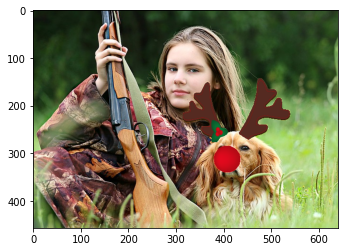

In [32]:
##main 
img_result2 = img.copy()

horns = cv2.imread('img/horns2.png', cv2.IMREAD_UNCHANGED)
horn_h, horn_w = horns.shape[:2]

nose = cv2.imread('img/nose.png', cv2.IMREAD_UNCHANGED)

for shape in shapes:
  horns_center = np.mean([shape[1], shape[4]], axis = 0)//[1, 1.3]
  horns_size = np.linalg.norm(shape[4]-shape[1])*3

  nose_center = shape[3]
  nose_size = horns_size //4

  angle = -angle_btw(shape[4], shape[1])

  M = cv2.getRotationMatrix2D((horn_w, horn_h), angle, 1)
  rotated_horns = cv2.warpAffine(horns, M, (horn_w, horn_h))

  img_result2 = overlay_transparent(img_result2, nose, nose_center[0], nose_center[1], overlay_size = (int(nose_size), int(nose_size)))
  img_result2 = overlay_transparent(img_result2, rotated_horns, horns_center[0], horns_center[1], overlay_size=(int(horns_size), int(horn_h * horns_size / horn_w)))

plt.imshow(img_result2)